In [98]:
from fastai.tabular.all import *
from fastai.collab import *
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

In [99]:
#loading the dataset
ratings = pd.read_csv('u.data', delimiter='\t', header=None,
                      usecols=(0,1,2), names=['user','movie','rating'])
ratings.head()
ratings.head()

,user,movie,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [100]:
#loading the dataset
ratings1 = pd.read_csv('u1.test', delimiter='\t', header=None,
                      usecols=(0,1,2), names=['user','movie','rating'])
Test_data = ratings1.merge(movies)
#Test_data.head()
Test_data1 = CollabDataLoaders.from_df(Test_data, item_name='title', bs=64)
Test_data1.show_batch()

,user,title,rating
0,140,In & Out (1997),3
1,200,Twelve Monkeys (1995),4
2,151,Smoke (1995),4
3,288,Mighty Aphrodite (1995),5
4,122,"Sex, Lies, and Videotape (1989)",5
5,457,GoodFellas (1990),4
6,307,Fargo (1996),3
7,6,In & Out (1997),2
8,200,"Kid in King Arthur's Court, A (1995)",4
9,244,Monty Python's Life of Brian (1979),5


In [101]:
movies = pd.read_csv('u.item',  delimiter='|', encoding='latin-1',
                     usecols=(0,1), names=('movie','title'), header=None)
movies.head()

,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [102]:
ratings = ratings.merge(movies)
ratings.head()

,user,movie,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


In [103]:
dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)

In [104]:
dls.show_batch()

,user,title,rating
0,889,Butch Cassidy and the Sundance Kid (1969),4
1,234,As Good As It Gets (1997),4
2,679,Fierce Creatures (1997),2
3,896,High Noon (1952),4
4,561,"Grifters, The (1990)",3
5,286,Get Shorty (1995),5
6,497,Star Trek: The Wrath of Khan (1982),3
7,419,"English Patient, The (1996)",4
8,648,White Squall (1996),1
9,733,Jane Eyre (1996),3


In [105]:
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5))

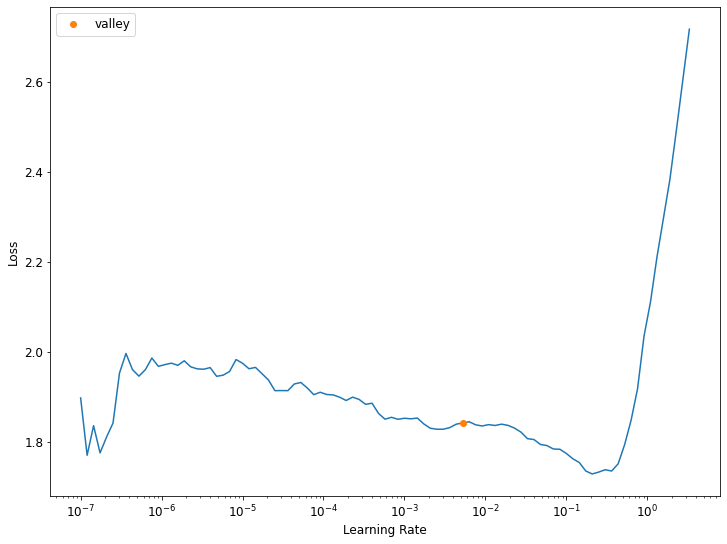

In [106]:
lr = learn.lr_find()

In [107]:
lr

SuggestedLRs(valley=0.005248074419796467)

In [108]:
# learn.fit_one_cycle(5, 5e-3, wd=0.1)

In [109]:
learn.fit_one_cycle(5, lr, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.950376,0.945305,00:13
1,0.842313,0.869440,00:13
2,0.744235,0.828205,00:13
3,0.580948,0.813320,00:13
4,0.471395,0.812804,00:13


In [110]:
# learn.fit_one_cycle(10, 1e-1, wd=0.1)

In [111]:
user_id = 1
movie_id = 100
input_data = {'user_id': user_id, 'movie_id': movie_id}

In [112]:
dl = learn.dls.test_dl(Test_data, bs=64) # apply transforms
preds,  _ = learn.get_preds(dl=dl) # get prediction

In [113]:
dl.show_batch()

,user,title,rating
0,1,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),5
1,9,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),5
2,63,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),3
3,79,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),4
4,90,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),4
5,409,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),4
6,1,Richard III (1995),3
7,7,Richard III (1995),4
8,49,Richard III (1995),3
9,59,Richard III (1995),4


In [114]:
preds

tensor([3.5260, 4.1576, 3.0346,  ..., 4.5340, 2.8909, 3.9873])

In [115]:
pd.DataFrame(preds.numpy()).head(10)

,0
0,3.526042
1,4.157583
2,3.034551
3,3.836698
4,3.725672
5,3.269320
6,3.907477
7,4.108039
8,3.719991
9,4.016419


In [116]:
Test_data.head(10)

,user,movie,rating,title
0,1,6,5,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
1,9,6,5,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
2,63,6,3,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
3,79,6,4,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
4,90,6,4,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
5,409,6,4,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
6,1,10,3,Richard III (1995)
7,7,10,4,Richard III (1995)
8,49,10,3,Richard III (1995)
9,59,10,4,Richard III (1995)
